Read in the cleaned data and schema

In [1]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import defaultdict
import general_functions as gf
%matplotlib inline

df = pd.read_csv(r'C:\\Users\\Jessica\\Desktop\\School\\Udacity Data Science\\Lesson 1 - Data Science Process\\Project 1\\reduced_data.csv', sep=',', error_bad_lines=False, index_col=False)
df_schem = pd.read_csv(r'C:\\Users\\Jessica\\Desktop\\School\\Udacity Data Science\\Lesson 1 - Data Science Process\\Project 1\\reduced_data_schema.csv', sep=',', error_bad_lines=False, index_col=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   Country                       64072 non-null  object 
 6   CurrencyDesc                  45472 non-null  object 
 7   CurrencySymbol                45472 non-null  object 
 8   DatabaseWorkedWith            49537 non-null  object 
 9   DevType                       49370 non-null  object 
 10  EdLevel                       57431 non-null  object 
 11  Employment                    63854 non-null  object 
 12  Ethnicity                     45948 non-null  object 
 13  G

Create list of possible languages used in 2020

In [2]:
lang_used = ['Assembly','Bash/Shell/PowerShell','C','C#','C++','Dart','Go','Haskell','HTML/CSS','Java','JavaScript','Julia','Kotlin','Objective-C','Perl','PHP','Python','R','Ruby','Rust','Scala','SQL','Swift','TypeScript','VBA','Other']

Create data frame of languages used sorted by total count

In [3]:
lang = df['LanguageWorkedWith'].value_counts().reset_index()
lang.rename(columns={'index':'language','LanguageWorkedWith':'count'}, inplace = True)
lang_df = gf.total_count(lang,'language','count',lang_used)
lang_df

,language,count
2,C,46769
9,Java,45749
10,JavaScript,38822
8,HTML/CSS,36181
21,SQL,31413
16,Python,25287
1,Bash/Shell/PowerShell,18980
3,C#,18041
15,PHP,15007
23,TypeScript,14578


Create a function to plot a bar chart of a given data frame

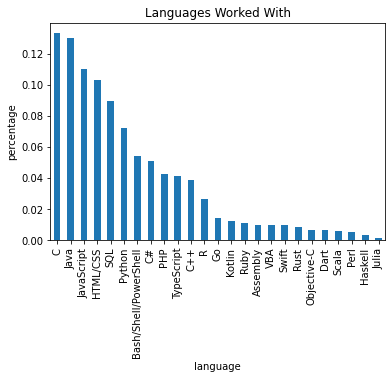

,count
language,
C,0.133258
Java,0.130352
JavaScript,0.110615
HTML/CSS,0.103090
SQL,0.089504
Python,0.072050
Bash/Shell/PowerShell,0.054079
C#,0.051404
PHP,0.042759


In [4]:
gf.bar_plotting(lang_df,'Languages Worked With',plot=True)

Create function to reassign ages in to bins containing a certain age range

In [5]:
def age_bins(age):
    if age < 10 :
        return 'Under 10 Years'
    elif age >= 10 and age < 20:
        return '10-19 Years'
    elif age >= 20 and age < 30:
        return '20-29 Years'
    elif age >= 30 and age < 40:
        return '30-39 Years'
    elif age >= 40 and age < 50:
        return '40-49 Years'
    elif age >= 50 and age < 60:
        return '50-59 Years'
    elif age >= 60 and age < 70:
        return '60-69 Years'
    elif age >= 70 and age < 80:
        return '70-79 Years'
    else:
        return 'Over 80 Years'

Create a new data frame sorted by the count of individuals in each age range

In [6]:
age_df = df['Age'].apply(age_bins).value_counts().reset_index()
age_df.rename(columns={'index':'age','Age':'count'}, inplace = True)
age_df

,age,count
0,20-29 Years,21268
1,Over 80 Years,19047
2,30-39 Years,14433
3,40-49 Years,4814
4,10-19 Years,2652
5,50-59 Years,1664
6,60-69 Years,479
7,70-79 Years,95
8,Under 10 Years,9


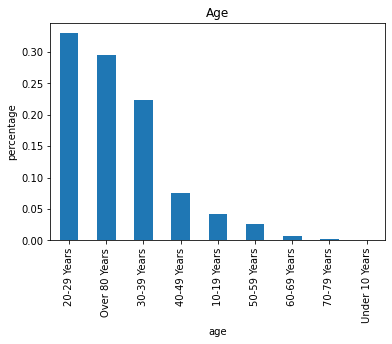

,count
age,
20-29 Years,0.329936
Over 80 Years,0.295481
30-39 Years,0.223903
40-49 Years,0.074681
10-19 Years,0.041141
50-59 Years,0.025814
60-69 Years,0.007431
70-79 Years,0.001474
Under 10 Years,0.000140


In [7]:
gf.bar_plotting(age_df,'Age',plot=True)

Add a new column to the original data frame to include the age ranges

In [8]:
df['AgeRanges']=df['Age'].apply(age_bins)
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,Country,CurrencyDesc,CurrencySymbol,DatabaseWorkedWith,DevType,...,NEWSOSites,NEWStuck,OpSys,PlatformDesireNextYear,PlatformWorkedWith,Trans,UndergradMajor,YearsCode,YearsCodePro,AgeRanges
0,1,I am a developer by profession,Yes,NaN,13,Germany,European Euro,EUR,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...",...,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,No,"Computer science, computer engineering, or sof...",36,27,Over 80 Years
1,2,I am a developer by profession,No,NaN,19,United Kingdom,Pound sterling,GBP,NaN,"Developer, full-stack;Developer, mobile",...,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,iOS;Kubernetes;Linux;MacOS,iOS,NaN,"Computer science, computer engineering, or sof...",7,4,Over 80 Years
2,3,I code primarily as a hobby,Yes,NaN,15,Russian Federation,NaN,NaN,NaN,NaN,...,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,4,NaN,Over 80 Years
3,4,I am a developer by profession,Yes,25.0,18,Albania,Albanian lek,ALL,NaN,NaN,...,Stack Overflow (public Q&A for anyone who code...,NaN,Linux-based,NaN,NaN,No,"Computer science, computer engineering, or sof...",7,4,20-29 Years
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,United States,NaN,NaN,MySQL;PostgreSQL;Redis;SQLite,NaN,...,Stack Overflow (public Q&A for anyone who code...,Call a coworker or friend;Visit Stack Overflow...,Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,AWS;Docker;Linux;MacOS;Windows,No,"Computer science, computer engineering, or sof...",15,8,30-39 Years


In [9]:
range_1 = gf.percentage_breakdown(df[df['AgeRanges']=='Under 10 Years'], lang_used, 'LanguageWorkedWith', 'Under 10 Years')
range_2 = gf.percentage_breakdown(df[df['AgeRanges']=='10-19 Years'], lang_used, 'LanguageWorkedWith', '10-19 Years')
range_3 = gf.percentage_breakdown(df[df['AgeRanges']=='20-29 Years'], lang_used, 'LanguageWorkedWith', '20-29 Years')
range_4 = gf.percentage_breakdown(df[df['AgeRanges']=='30-39 Years'], lang_used, 'LanguageWorkedWith', '30-39 Years')
range_5 = gf.percentage_breakdown(df[df['AgeRanges']=='40-49 Years'], lang_used, 'LanguageWorkedWith', '40-49 Years')
range_6 = gf.percentage_breakdown(df[df['AgeRanges']=='50-59 Years'], lang_used, 'LanguageWorkedWith', '50-59 Years')
range_7 = gf.percentage_breakdown(df[df['AgeRanges']=='60-69 Years'], lang_used, 'LanguageWorkedWith', '60-69 Years')
range_8 = gf.percentage_breakdown(df[df['AgeRanges']=='70-79 Years'], lang_used, 'LanguageWorkedWith', '70-79 Years')
range_9 = gf.percentage_breakdown(df[df['AgeRanges']=='Over 80 Years'], lang_used, 'LanguageWorkedWith', 'Over 80 Years')

In [10]:
list_of_ranges = [range_1, range_2, range_3, range_4, range_5, range_6, range_7, range_8, range_9]
top_lang_by_age = pd.DataFrame(columns = ['Age Range','Most Used Language'])
top_lang_by_age = gf.add_top_per_cat(top_lang_by_age, list_of_ranges)

In [26]:
comp_df = pd.merge(range_1, range_2, left_index=True, right_index=True)
comp_df.columns = ['Under 10 Years', '10-19 Years']
for x in list_of_ranges[2:]:
    comp_df[x.columns[0]] = x
comp_df['Total'] = gf.percentage_breakdown(df, lang_used, 'LanguageWorkedWith', 'Total')
comp_df = comp_df.sort_values(by=['Total'], ascending=False)
comp_df = comp_df.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df

,Under 10 Years,10-19 Years,20-29 Years,30-39 Years,40-49 Years,50-59 Years,60-69 Years,70-79 Years,Over 80 Years,Total
LanguageWorkedWith,,,,,,,,,,
C,0.079365,0.142593,0.131754,0.130601,0.132036,0.138377,0.142519,0.147410,0.136522,0.133258
Java,0.095238,0.126571,0.131476,0.130934,0.126407,0.120576,0.108172,0.105578,0.132227,0.130352
JavaScript,0.095238,0.099334,0.111297,0.114668,0.109659,0.101928,0.091591,0.091633,0.109360,0.110615
HTML/CSS,0.079365,0.111905,0.104396,0.101439,0.098853,0.094618,0.085669,0.095618,0.104151,0.103090
SQL,0.095238,0.061437,0.087889,0.093168,0.100695,0.103094,0.107383,0.097610,0.087488,0.089504
Python,0.031746,0.098657,0.075723,0.065594,0.062335,0.067493,0.067509,0.069721,0.071752,0.072050
Bash/Shell/PowerShell,0.031746,0.046463,0.050377,0.061890,0.069979,0.070036,0.067509,0.063745,0.044426,0.054079
C#,0.047619,0.049852,0.047861,0.053664,0.060876,0.057533,0.058034,0.053785,0.050753,0.051404
PHP,0.063492,0.041965,0.043640,0.040263,0.037630,0.035177,0.038295,0.045817,0.047398,0.042759


In [13]:
top_lang_by_age

,Age Range,Most Used Language
0,Under 10 Years,SQL
1,10-19 Years,C
2,20-29 Years,C
3,30-39 Years,Java
4,40-49 Years,C
5,50-59 Years,C
6,60-69 Years,C
7,70-79 Years,C
8,Over 80 Years,C
